In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_unmon2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/unmon2.csv", header=None)

In [ ]:
# Transpose data
df_unmon2 = df_unmon2.transpose()
df_unmon2.rename(columns=df_unmon2.iloc[0], inplace=True)
df_unmon2 = df_unmon2.drop(df_unmon2.index[0])

In [ ]:
# Extract X and y
X = np.array(df_unmon2.iloc[:, 1:])
y = np.repeat(np.arange(95), 200)  # add 0 ~ 94, 200 times each
y = np.append(y, np.full(10000, -1))  # add 10000 -1's

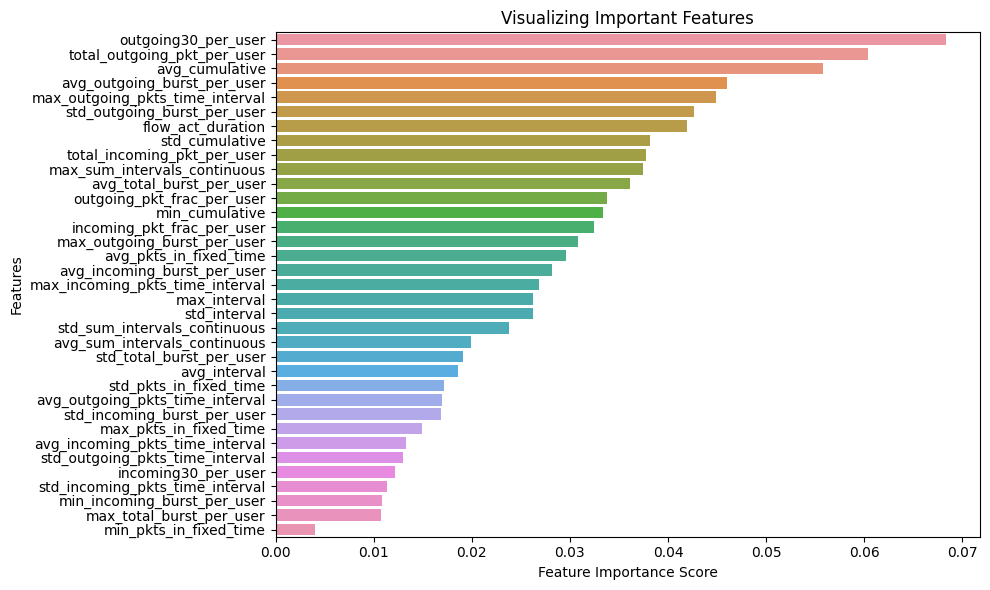

In [ ]:
# Extract feature importance by using decision tree classifier
model = DecisionTreeClassifier()
model.fit(X, y)
importance = model.feature_importances_
feature_imp = pd.Series(importance, index=df_unmon2.iloc[:, 1:].columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [ ]:
# SVM model training and evaluation function
def svm_model_top_n_grid_search(top_n):
    # Extract n most important features
    X_svm = np.array(df_unmon2[feature_imp.index[:top_n]])

    # Split data
    X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y, test_size=0.2, random_state=42)

    # Normalization
    scaler_svm = StandardScaler()
    X_train_svm = scaler_svm.fit_transform(X_train_svm)
    X_test_svm = scaler_svm.transform(X_test_svm)

    # SVM model with GridSearch
    param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
    grid_svm = GridSearchCV(SVC(), param_grid, cv=5)
    grid_svm.fit(X_train_svm, y_train_svm)

    # Best accuracy and parameters
    print('Best accuracy:', grid_svm.best_score_)
    print('Best parameters:', grid_svm.best_params_)

    # Performance
    pred_svm = grid_svm.best_estimator_.predict(X_test_svm)
    print("\n[Performance]")
    print("Accuracy:", accuracy_score(y_test_svm, pred_svm))
    print("Recall:", recall_score(y_test_svm, pred_svm, average='weighted'))
    print("Precision:", precision_score(y_test_svm, pred_svm, average='weighted'))

# SVM with the 25 most important features and GridSearch

In [ ]:
svm_model_top_n_grid_search(25)

Best accuracy: 0.669655172413793
Best parameters: {'C': 10, 'kernel': 'rbf'}

[Performance]
Accuracy: 0.6674137931034483
Recall: 0.6674137931034483
Precision: 0.666721059843416


# SVM with all 36 features and GridSearch

In [ ]:
svm_model_top_n_grid_search(36)

Best accuracy: 0.66875
Best parameters: {'C': 10, 'kernel': 'rbf'}

[Performance]
Accuracy: 0.6656896551724137
Recall: 0.6656896551724137
Precision: 0.6645435335629964


# SVM with 5 most important features and GridSearch

In [ ]:
svm_model_top_n_grid_search(5)

Best accuracy: 0.48250000000000004
Best parameters: {'C': 10, 'kernel': 'rbf'}

[Performance]
Accuracy: 0.4820689655172414
Recall: 0.4820689655172414
Precision: 0.43057380803201856


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
